In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from keras.layers import Flatten, Dense, Activation


In [ ]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

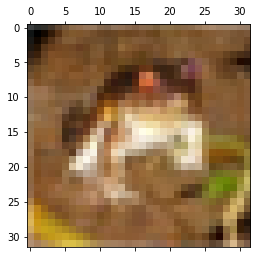

In [ ]:
plt.matshow(X_train[0])

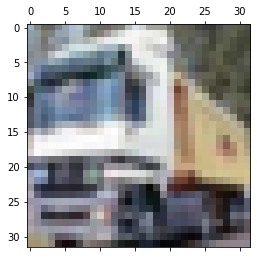

In [ ]:
plt.matshow(X_train[1])

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
y_train[1]

array([9], dtype=uint8)

In [ ]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)

In [ ]:
y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

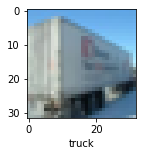

In [ ]:
plot_sample(X_train, y_train, 15)

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 22s 6ms/step - loss: 1.9591 - accuracy: 0.3984
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2888 - accuracy: 0.5430
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1409 - accuracy: 0.5991
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0362 - accuracy: 0.6375
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9631 - accuracy: 0.6654
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8964 - accuracy: 0.6918
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8437 - accuracy: 0.7077
Epoch 8/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8020 - accuracy: 0.7221
Epoch 9/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7498 - accuracy: 0.7404
Epoch 10/10
1563/1563 [==============================] - 10s 6ms/step - l

In [ ]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.1193 - accuracy: 0.6539


[1.119325876235962, 0.6539000272750854]

In [ ]:
y_predicted = cnn.predict(X_test)
y_predicted[0]

array([0.00546709, 0.00476583, 0.01616177, 0.87347895, 0.01488498,
       0.05452972, 0.0045901 , 0.00570782, 0.0187048 , 0.00170894],
      dtype=float32)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[5.4670870e-03, 4.7658295e-03, 1.6161770e-02, 8.7347895e-01,
        1.4884978e-02, 5.4529723e-02, 4.5901015e-03, 5.7078232e-03,
        1.8704798e-02, 1.7089432e-03],
       [1.8850157e-02, 2.0938298e-02, 3.5111962e-06, 1.2776492e-06,
        4.6683795e-09, 9.7969268e-09, 7.3327882e-09, 1.6600069e-08,
        9.5966154e-01, 5.4508128e-04],
       [2.3190556e-01, 3.3439720e-01, 8.5121347e-03, 5.6475317e-03,
        1.7279616e-04, 5.3304102e-04, 2.2051900e-04, 3.9717825e-03,
        1.0728197e-01, 3.0735743e-01],
       [5.7082564e-01, 3.0689214e-03, 3.4709089e-04, 8.7759746e-03,
        3.7370482e-05, 4.1388853e-06, 7.9817192e-07, 8.2642146e-06,
        4.1690153e-01, 3.0255491e-05],
       [9.1603352e-03, 7.3600566e-04, 1.8965469e-01, 4.5225028e-02,
        3.3036616e-01, 7.3141064e-03, 4.1349384e-01, 1.6658175e-03,
        2.9583200e-04, 2.0882438e-03]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 6]

In [ ]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)